# BTS Airline Exploratory Analysis

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/Users/rochanehurst/Documents/Personal Projects/BTS - Airline Analysis/Notebooks/bts_airline_clean.csv")
df

,year,month,day_of_month,day_of_week,flight_date,carrier,origin,origin_city,dest,dest_city,...,cancelled,cancellation_code,diverted,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft,delay_category
0,2025.0,4.0,1.0,Tuesday,2025-04-01,AA,ABQ,"Albuquerque, NM",DFW,"Dallas/Fort Worth, TX",...,False,NaN,False,569.0,0.0,0.0,0.0,0.0,0.0,Early
1,2025.0,4.0,1.0,Tuesday,2025-04-01,AA,ABQ,"Albuquerque, NM",DFW,"Dallas/Fort Worth, TX",...,False,NaN,False,569.0,0.0,0.0,0.0,0.0,0.0,Early
2,2025.0,4.0,1.0,Tuesday,2025-04-01,AA,ABQ,"Albuquerque, NM",DFW,"Dallas/Fort Worth, TX",...,False,NaN,False,569.0,0.0,0.0,0.0,0.0,0.0,Early
3,2025.0,4.0,1.0,Tuesday,2025-04-01,AA,ABQ,"Albuquerque, NM",DFW,"Dallas/Fort Worth, TX",...,False,NaN,False,569.0,0.0,0.0,0.0,0.0,0.0,On Time / Minor
4,2025.0,4.0,1.0,Tuesday,2025-04-01,AA,ABQ,"Albuquerque, NM",DFW,"Dallas/Fort Worth, TX",...,False,NaN,False,569.0,0.0,0.0,0.0,0.0,32.0,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583945,2025.0,4.0,30.0,Wednesday,2025-04-30,YX,TYS,"Knoxville, TN",LGA,"New York, NY",...,False,NaN,False,647.0,0.0,0.0,0.0,0.0,0.0,Early
583946,2025.0,4.0,30.0,Wednesday,2025-04-30,YX,TYS,"Knoxville, TN",LGA,"New York, NY",...,False,NaN,False,647.0,0.0,0.0,0.0,0.0,0.0,On Time / Minor
583947,2025.0,4.0,30.0,Wednesday,2025-04-30,YX,TYS,"Knoxville, TN",LGA,"New York, NY",...,False,NaN,False,647.0,0.0,0.0,0.0,0.0,0.0,Early
583948,2025.0,4.0,30.0,Wednesday,2025-04-30,YX,XNA,"Fayetteville, AR",LGA,"New York, NY",...,False,NaN,False,1147.0,0.0,0.0,0.0,0.0,0.0,On Time / Minor


## High Level Overview

In [7]:
#shape of dataset
df.shape

(583950, 22)

In [8]:
#quick look at top rows
df.head()

,year,month,day_of_month,day_of_week,flight_date,carrier,origin,origin_city,dest,dest_city,...,cancelled,cancellation_code,diverted,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft,delay_category
0,2025.0,4.0,1.0,Tuesday,2025-04-01,AA,ABQ,"Albuquerque, NM",DFW,"Dallas/Fort Worth, TX",...,False,NaN,False,569.0,0.0,0.0,0.0,0.0,0.0,Early
1,2025.0,4.0,1.0,Tuesday,2025-04-01,AA,ABQ,"Albuquerque, NM",DFW,"Dallas/Fort Worth, TX",...,False,NaN,False,569.0,0.0,0.0,0.0,0.0,0.0,Early
2,2025.0,4.0,1.0,Tuesday,2025-04-01,AA,ABQ,"Albuquerque, NM",DFW,"Dallas/Fort Worth, TX",...,False,NaN,False,569.0,0.0,0.0,0.0,0.0,0.0,Early
3,2025.0,4.0,1.0,Tuesday,2025-04-01,AA,ABQ,"Albuquerque, NM",DFW,"Dallas/Fort Worth, TX",...,False,NaN,False,569.0,0.0,0.0,0.0,0.0,0.0,On Time / Minor
4,2025.0,4.0,1.0,Tuesday,2025-04-01,AA,ABQ,"Albuquerque, NM",DFW,"Dallas/Fort Worth, TX",...,False,NaN,False,569.0,0.0,0.0,0.0,0.0,32.0,Delayed


In [9]:
#summary stats
df.describe()

,year,month,day_of_month,departure_delay,arrival_delay,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft
count,583950.0,583950.0,583950.000000,579283.000000,577730.000000,583950.000000,583950.000000,583950.000000,583950.000000,583950.000000,583950.000000
mean,2025.0,4.0,15.470753,10.411003,5.664272,845.727341,4.390069,0.742740,2.985730,0.025329,5.284283
std,0.0,0.0,8.633407,51.235335,53.373216,599.596381,33.236647,12.317432,16.119172,2.223632,28.133781
min,2025.0,4.0,1.000000,-52.000000,-76.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2025.0,4.0,8.000000,-7.000000,-15.000000,404.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2025.0,4.0,15.000000,-3.000000,-6.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2025.0,4.0,23.000000,7.000000,8.000000,1085.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2025.0,4.0,30.000000,2595.000000,2575.000000,5095.000000,2575.000000,1273.000000,1201.000000,981.000000,2326.000000


## On-Time Delay Analysis

In [10]:
# Categorize further for easier analysis.
df['is_delayed'] = df['delay_category'].isin(["Delayed", "Severe Delay"])

In [11]:
#Sum of all flights considered delayed and severe delayed
total_value = df['is_delayed'].sum()
total_value

np.int64(115991)

In [12]:
#Overall % of flights delayed (by FAA definition: >15 mins late)
overall_delay_rate = df['is_delayed'].mean() * 100

print(f"Overall delay rate: {overall_delay_rate:.2f}%")

Overall delay rate: 19.86%


In [13]:
# % of Flights delayed per airline
delay_by_carrier = df.groupby('carrier')['is_delayed'].mean() * 100
delay_by_carrier = delay_by_carrier.sort_values(ascending = False)

# to format into each airline, 2 decimals place
for carrier, pct in delay_by_carrier.items():
    print(f"{carrier}: {pct:.2f}%")

F9: 26.91%
OH: 26.71%
AA: 25.05%
MQ: 22.98%
G4: 20.34%
WN: 18.84%
AS: 18.34%
UA: 18.21%
OO: 18.10%
DL: 17.74%
HA: 17.46%
B6: 17.29%
NK: 17.04%
YX: 16.32%


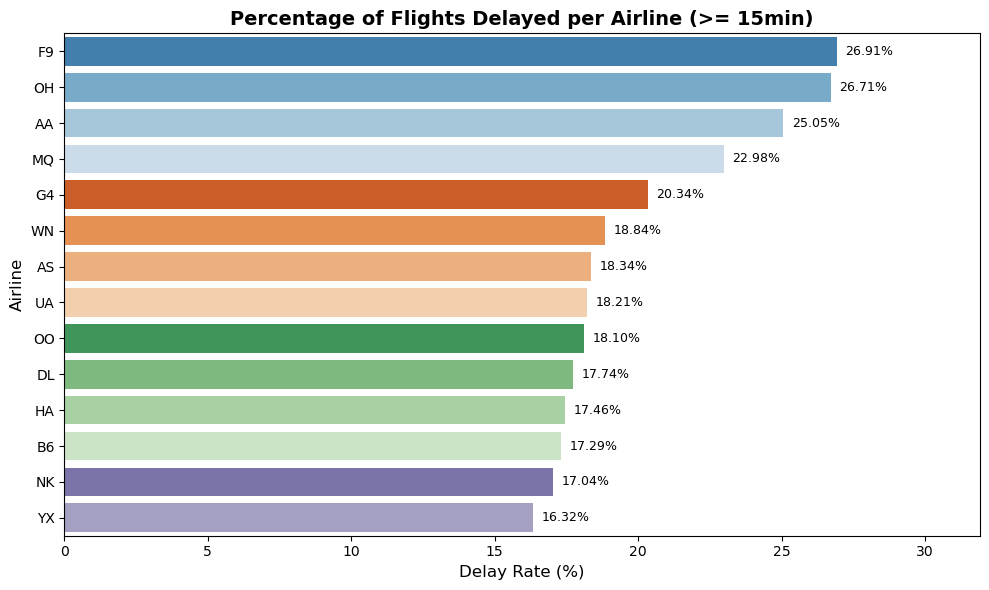

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=delay_by_carrier.values, 
    y=delay_by_carrier.index, 
    hue=delay_by_carrier.index,
    dodge = False,
    legend = False,
    palette="tab20c",
    order=delay_by_carrier.index
)
plt.xlabel("Delay Rate (%)", fontsize=12)
plt.ylabel("Airline",fontsize=12)
plt.title("Percentage of Flights Delayed per Airline (>= 15min)", fontsize=14, weight="bold")

# extend x axis a bit
plt.xlim(0, delay_by_carrier.max() + 5)


# add labels on bars
for i, v in enumerate(delay_by_carrier.values):
    plt.text(v + 0.3, i, f"{v:.2f}%", va="center", fontsize=9)

plt.tight_layout()
plt.show()

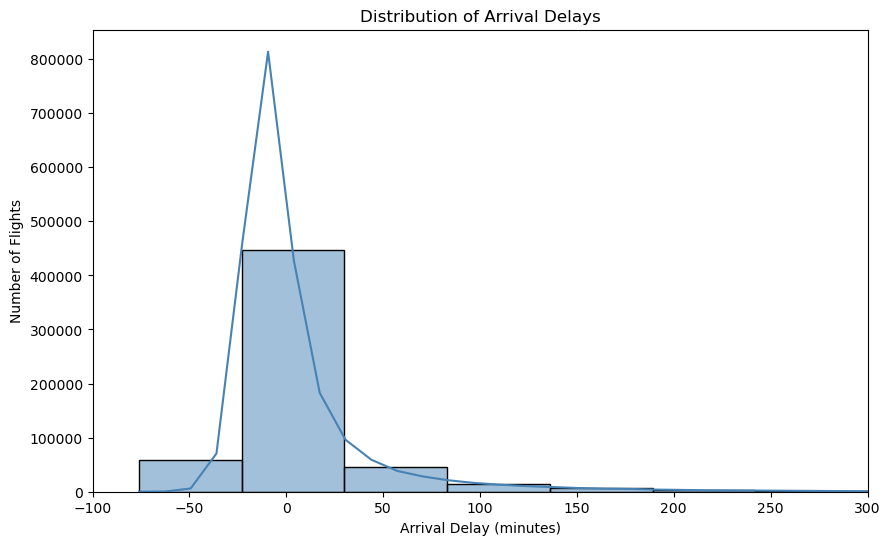

In [15]:
#Distribution of arrival_delay
#Histogram _ KDE overlay to show the shape of delays

plt.figure(figsize=(10,6))
sns.histplot(
    df['arrival_delay'], 
    bins=50, 
    kde=True, 
    color = "steelblue"
)
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Number of Flights")
plt.title("Distribution of Arrival Delays")
plt.xlim(-100,300) #trims out extreme outliers for readability
plt.show()

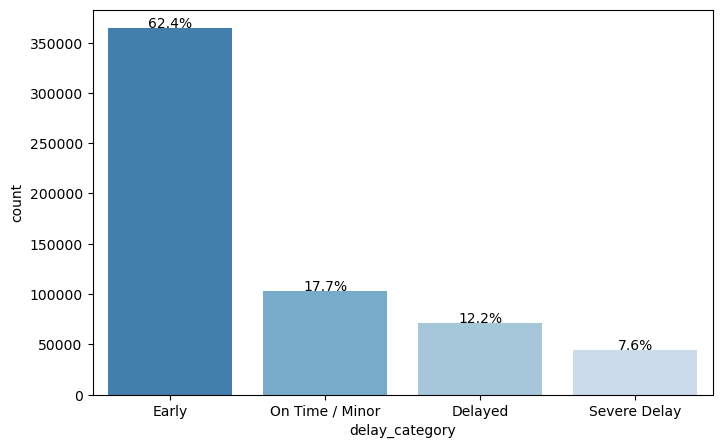

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(
    x="delay_category",
    data=df,
    order=df['delay_category'].value_counts().index, 
    hue="delay_category",
    dodge = False,
    legend = False,
    palette="tab20c",
)

total = len(df) #counts total numbers of rows(flights) in the dataset
for p in plt.gca().patches: #plt.gca() = get current axes (current plot), .patches = rectangular bars in the chart
    height = p.get_height() #gets the height of the bar
    plt.text(p.get_x() + p.get_width()/2.,  #x-position - center of bar
             height + 500, # y-position - just above the bar
            f'{100*height/total:.1f}%', #text label (percentage to 1 decimal)
             ha="center") #horizontally aligns(ha) text to center
    
plt.show()

## Airline Performance

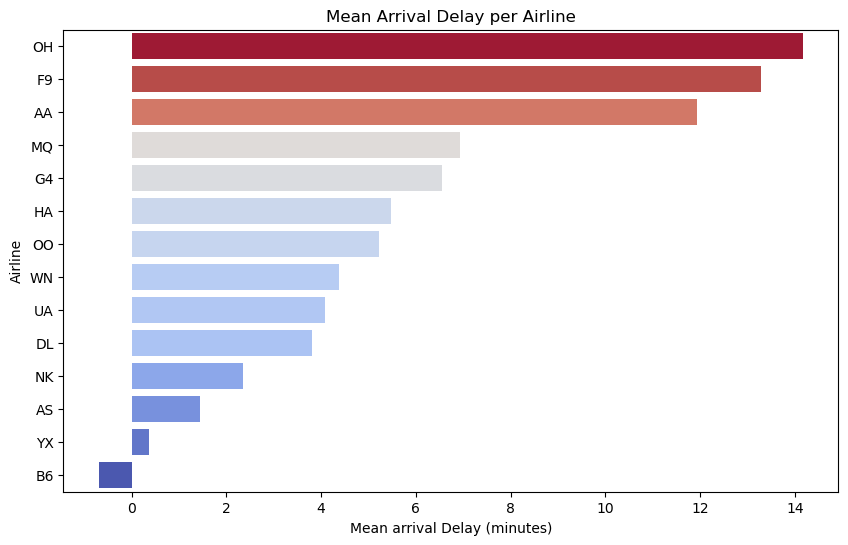

In [62]:
# Average (Mean) Delay Per Airline
avg_delay_by_carrier = df.groupby("carrier")["arrival_delay"].mean().sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_delay_by_carrier.values,
    y=avg_delay_by_carrier.index,
    hue = avg_delay_by_carrier.values,
    legend = False,
    palette = "coolwarm"
)

plt.xlabel("Mean arrival Delay (minutes)")
plt.ylabel("Airline")
plt.title("Mean Arrival Delay per Airline")

plt.show()

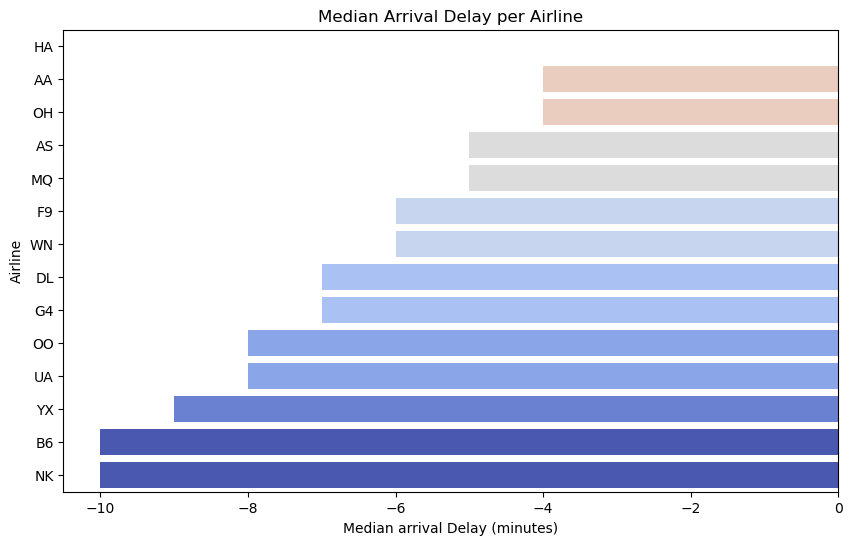

In [18]:
# Average Delay Per Airline
avg_delay_by_carrier = df.groupby("carrier")["arrival_delay"].median().sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(
    x=avg_delay_by_carrier.values,
    y=avg_delay_by_carrier.index,
    hue = avg_delay_by_carrier.values,
    legend = False,
    palette = "coolwarm"
)

plt.xlabel("Median arrival Delay (minutes)")
plt.ylabel("Airline")
plt.title("Median Arrival Delay per Airline")

plt.show()

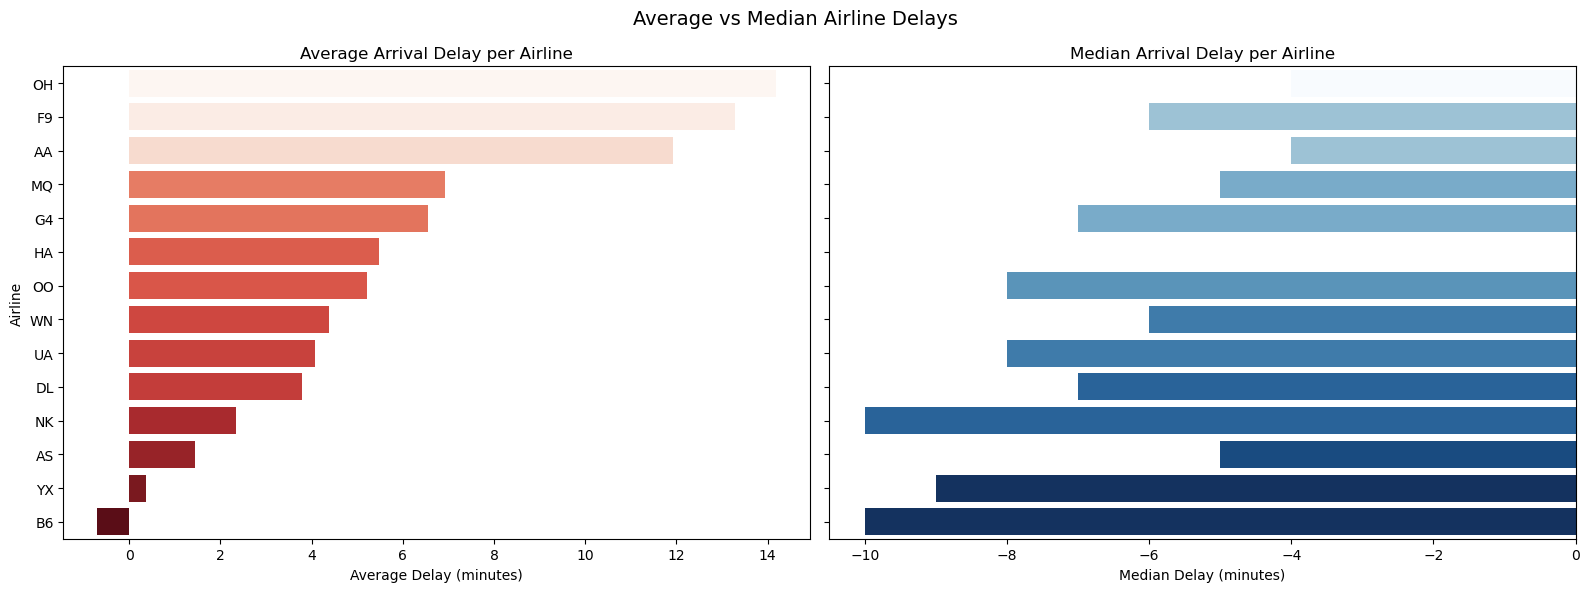

In [19]:
# Calculate average and median delays per airline
avg_delay = df.groupby('carrier')['arrival_delay'].mean().sort_values(ascending=False)
median_delay = df.groupby('carrier')['arrival_delay'].median().sort_values(ascending=False)

order=avg_delay.index

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- Average delays ---
sns.barplot(
    x=avg_delay.values, 
    y=avg_delay.index, 
    ax=axes[0], 
    hue = avg_delay.values,
    legend=False,
    palette="Reds_r",
    order=order
)
axes[0].set_title("Average Arrival Delay per Airline")
axes[0].set_xlabel("Average Delay (minutes)")
axes[0].set_ylabel("Airline")

# --- Median delays ---
sns.barplot(
    x=median_delay[order].values, 
    y=median_delay[order].index, 
    ax=axes[1], 
    hue = median_delay.values,
    legend=False,
    palette="Blues_r"
)
axes[1].set_title("Median Arrival Delay per Airline")
axes[1].set_xlabel("Median Delay (minutes)")
axes[1].set_ylabel("")  # remove duplicate y-label

plt.suptitle("Average vs Median Airline Delays", fontsize=14)
plt.tight_layout()
plt.show()


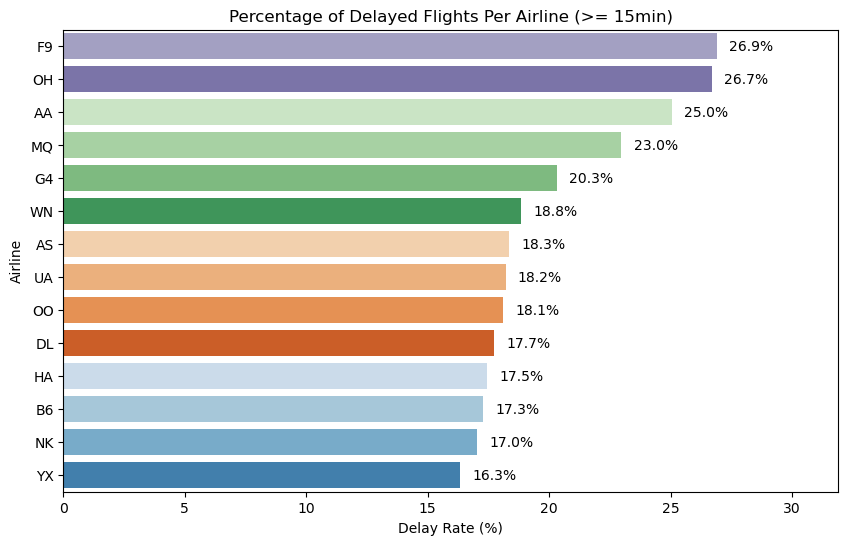

In [20]:
#A flight is considered delayed if arrival_delay > 15, 
#we will compute the percentage of delayed flights per airline and visualize in two ways: 
# 1.Bar Plot
# 2.Boxplot

# -- % Delay rate per airline
delay_rate = df.groupby('carrier')['is_delayed'].mean() * 100
delay_rate = delay_rate.sort_values(ascending = False)

#Bar Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=delay_rate.values, 
    y=delay_rate.index,
    hue=delay_rate.values,
    legend=False,
    palette="tab20c"
)

# extend x axis a bit
plt.xlim(0, delay_by_carrier.max() + 5)

# annotate percentage on bars
for i, v in enumerate(delay_rate):
    ax.text(v + 0.5, i, f"{v:.1f}%", va="center")

plt.xlabel("Delay Rate (%)")
plt.ylabel("Airline")
plt.title("Percentage of Delayed Flights Per Airline (>= 15min)")

plt.show()


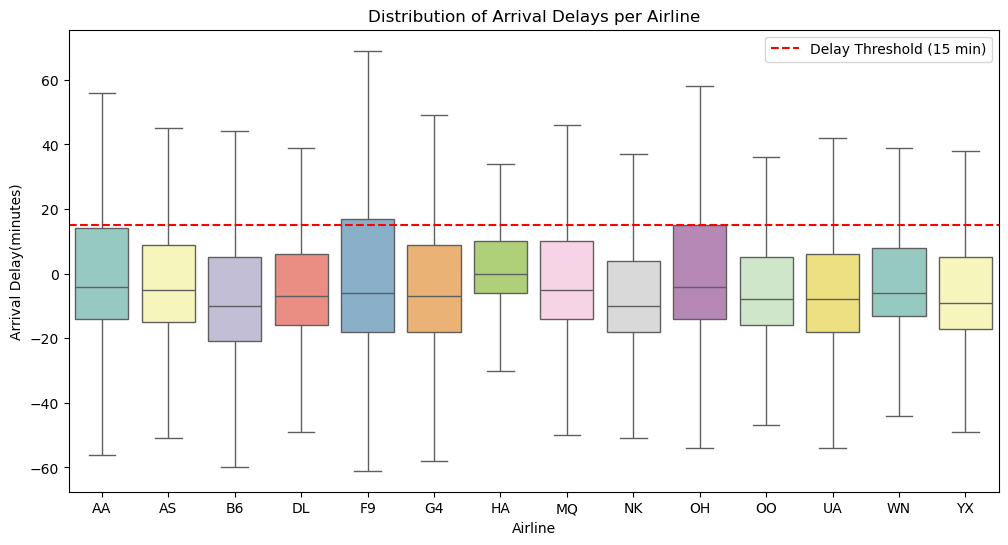

In [21]:
#Box Plot

plt.figure(figsize=(12,6))
sns.boxplot(
    x='carrier',
    y='arrival_delay',
    data=df,
    showfliers=False,
    hue='carrier',
    legend=False,
    palette="Set3"
)

plt.axhline(15, 
            color='red', 
            linestyle='--',
            label="Delay Threshold (15 min)"
)

plt.ylabel("Arrival Delay(minutes)")
plt.xlabel("Airline")
plt.title("Distribution of Arrival Delays per Airline")

plt.legend()
plt.show()

# Airport Performance

Top 10 Origin Airports with Worst Delays:
 origin
DDC    87.020000
FAY    71.000000
HTS    53.764706
USA    49.032258
RKS    47.500000
BFF    47.166667
LBL    43.469388
TRI    39.125000
SMX    38.125000
GCC    37.033898
Name: arrival_delay, dtype: float64

Top 10 Destination Airports with Worst Delays:
 dest
FAY    205.666667
VCT     62.313725
HOB     59.931034
HTS     44.529412
PVU     32.996337
TRI     32.595745
COD     26.830508
PIB     26.529412
BTM     26.018519
HGR     26.000000
Name: arrival_delay, dtype: float64


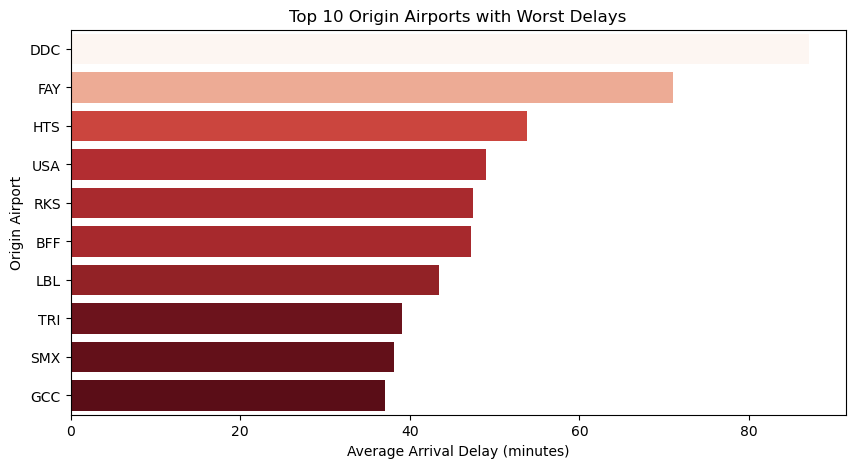

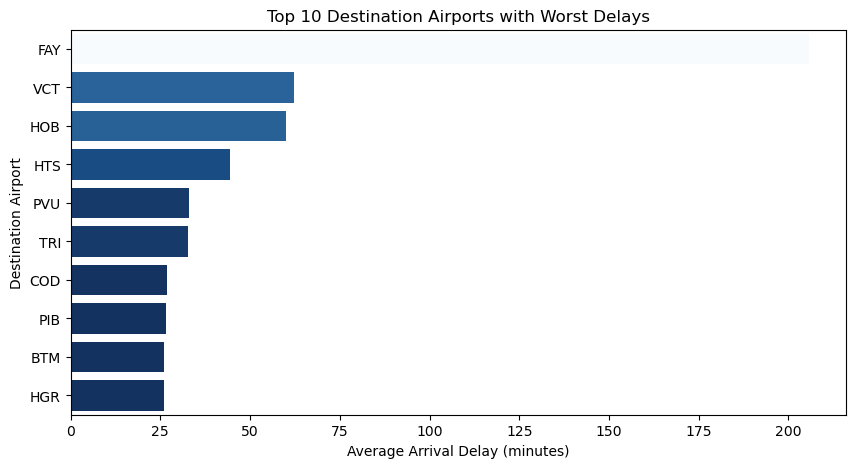

In [22]:
#Average Delay by origin airport
origin_delay = df.groupby('origin')['arrival_delay'].mean().sort_values(ascending=False).head(10)

#Average Delay by destination airport
dest_delay = df.groupby('dest')['arrival_delay'].mean().sort_values(ascending=False).head(10)

print("Top 10 Origin Airports with Worst Delays:\n", origin_delay)
print("\nTop 10 Destination Airports with Worst Delays:\n", dest_delay)

#Plot (orgin)
plt.figure(figsize=(10,5))
sns.barplot(
    x=origin_delay.values,
    y=origin_delay.index,
    hue=origin_delay.values,
    legend=False,
    palette="Reds_r"
)

plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Origin Airport")
plt.title("Top 10 Origin Airports with Worst Delays")
plt.show()

# Plot (destination)
plt.figure(figsize=(10,5))
sns.barplot(
    x=dest_delay.values, 
    y=dest_delay.index, 
    hue=dest_delay.values,
    legend=False,
    palette="Blues_r"
)

plt.xlabel("Average Arrival Delay (minutes)")
plt.ylabel("Destination Airport")
plt.title("Top 10 Destination Airports with Worst Delays")
plt.show()

In [96]:
!pip install kaggle



In [23]:
import os, json

os.environ["KAGGLE_USERNAME"] = "roxieh"
os.environ["KAGGLE_KEY"] = "74bed61dea63859bf1f9fff05a99dfe0"



In [99]:
!kaggle datasets download -d aravindram11/list-of-us-airports -p ./data --unzip


Dataset URL: https://www.kaggle.com/datasets/aravindram11/list-of-us-airports
License(s): DbCL-1.0
  0%|                                               | 0.00/10.5k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 10.5k/10.5k [00:00<00:00, 18.1MB/s]


In [24]:
#downloaded additional csv for lat/long of airports
airports = pd.read_csv("./data/airports.csv")
airports.head()


,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.174320,-149.996186
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872
4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228


In [25]:
#Merge origin airport info

df = df.merge(airports[['IATA', 'LATITUDE', 'LONGITUDE']],
             left_on='origin', right_on='IATA', how='left')
#rename to avoid confusion
df.rename(columns={'Latitude': 'origin_lat', 'Longitude': 'origin_lon'}, inplace=True)

df = df.merge(airports[['IATA', 'LATITUDE', 'LONGITUDE']],
             left_on='origin', right_on='IATA', how='left',
              suffixes=('_origin', '_dest'))

In [26]:
#Aggregate Delay per Airport
airport_delay = df.groupby('origin').arrival_delay.mean().reset_index()
airport_delay = airport_delay.merge(
    airports[['IATA', 'LATITUDE', 'LONGITUDE']],
    left_on='origin', right_on='IATA'
)

In [110]:
!pip install folium


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [folium]


In [28]:
import folium
from folium.plugins import HeatMap

# Filter airports with more than 30 flights
airport_counts = df.groupby("origin").size()   # count flights per airport
valid_airports = airport_counts[airport_counts > 30].index
filtered_airport_delay = airport_delay[airport_delay["IATA"].isin(valid_airports)]

# Create base US Map
m = folium.Map(location=[37, -95], zoom_start=4)

# Add heatmap
heat_data = list(zip(filtered_airport_delay['LATITUDE'],
                     filtered_airport_delay['LONGITUDE'],
                     filtered_airport_delay['arrival_delay']))

HeatMap(
    heat_data, 
    radius=12, 
    max_zoom=8,
    min_opacity=0.5, #keeps heat visible even at closer zoom
    blur=5 #smooths heat
).add_to(m)

# Add airport markers with codes
for _, row in filtered_airport_delay.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=2,
        popup=f"{row['IATA']}: {row['arrival_delay']:.2f} min",
        color="red",
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m


## Time Patterns

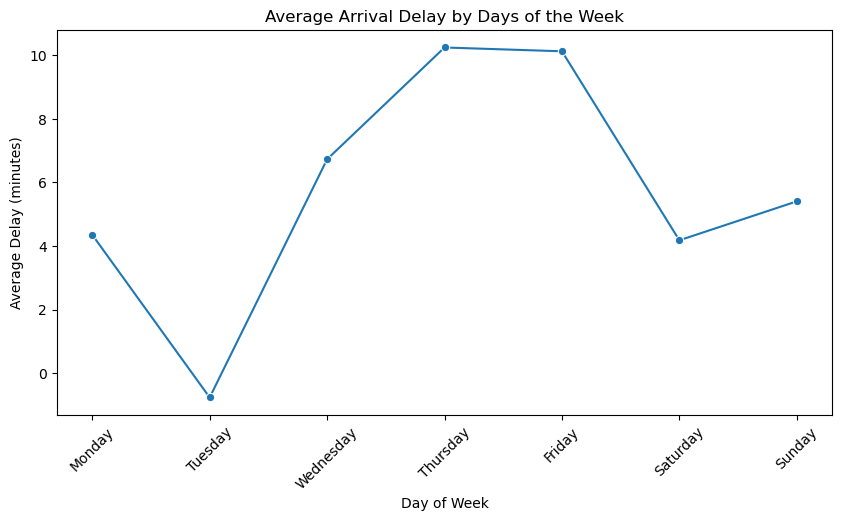

In [29]:
#Delays by day of the week

#group by day of the week
dow_delay = df.groupby('day_of_week')['arrival_delay'].mean()

#reindex to ensure monday-sunday order
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
dow_delay = dow_delay.reindex(order)

#plot
plt.figure(figsize=(10,5))
sns.lineplot(
    x=dow_delay.index,
    y=dow_delay.values,
    marker="o"
)
plt.xlabel("Day of Week")
plt.ylabel("Average Delay (minutes)")
plt.title("Average Arrival Delay by Days of the Week")
plt.xticks(rotation=45)
plt.show()

## Delay Causes
        

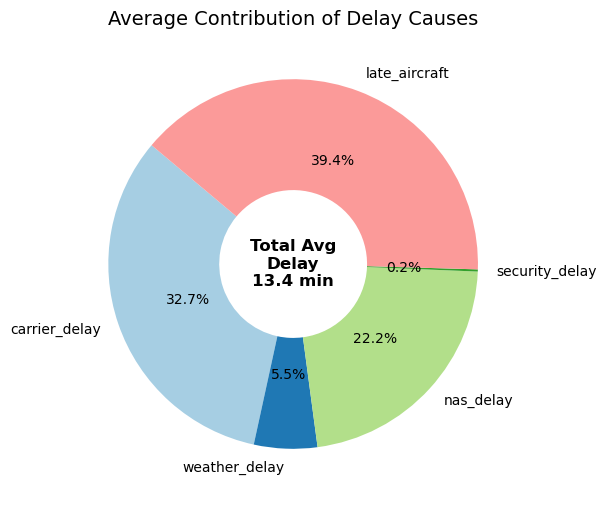

In [30]:
import matplotlib.pyplot as plt

# Calculate average contribution of each delay type
delay_causes = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft']].mean()

# Donut chart
plt.figure(figsize=(8, 6))
colors = plt.cm.Paired.colors  # nice categorical colormap
wedges, texts, autotexts = plt.pie(
    delay_causes,
    labels=delay_causes.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.6)  # <-- makes it a donut
)

# Center label for total delays
plt.text(0, 0, f"Total Avg\nDelay\n{delay_causes.sum():.1f} min",
         ha='center', va='center', fontsize=12, weight='bold')


plt.title("Average Contribution of Delay Causes", fontsize=14)
plt.show()


## Correlations & Interesting Insights

[]

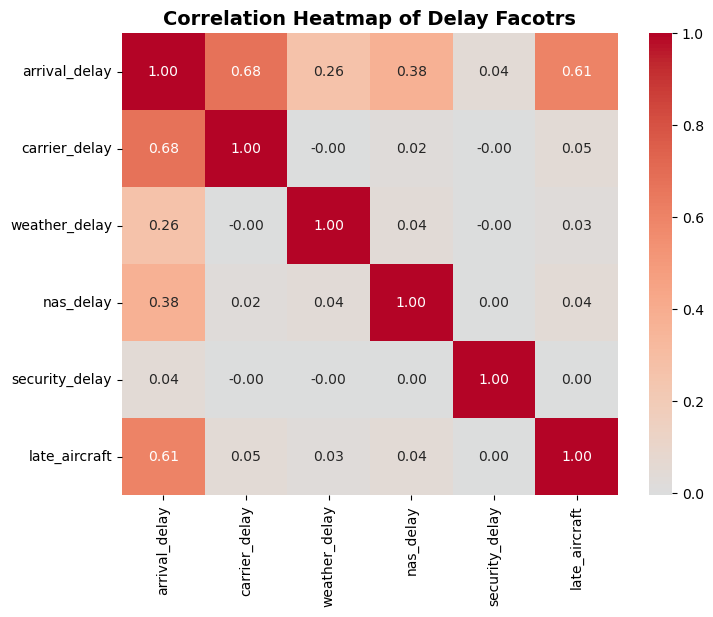

In [31]:
# select only delay-related columns
delay_cols = ["arrival_delay", "carrier_delay", "weather_delay", "nas_delay", "security_delay", "late_aircraft"]

corr = df[delay_cols].corr()

#plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Correlation Heatmap of Delay Facotrs", fontsize=14, weight="bold")
plt.plot()